# Question 1 b code

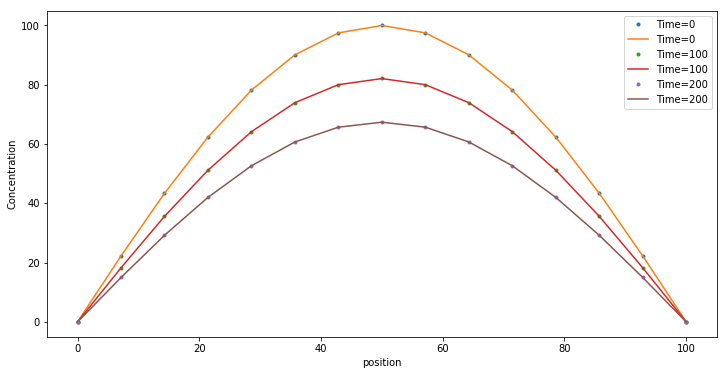

In [17]:
import numpy as np
import matplotlib.pyplot as plt

D=2
A=100
L=100 #values for simulation
N=15
dx=(L)/(N-1)
dt=1
X=np.arange(0,L+1,(L)/(N-1)) # position from center of diffusion
D_dt_dx2=(D*(dt))/(dx**2)

Grid=np.zeros((15,300)) #grid for forward-euler
Grid_exact=np.zeros((15,300)) # matrix for concentration using exact solution
for l in range(len(Grid[:,0])):
    Grid[l][0]=A*np.sin((np.pi*l*dx)/L)
for v in range(len(Grid[0,:])-1): # will insure loop goes through time steps equal to t
    for m in range(len(Grid[:,0])):
        if m == 0: #These if statements ensure forward-euler is not executed on border
            continue
        if m == 14:
            continue
        Grid[m][v+1]=Grid[m][v]+D_dt_dx2*(Grid[m+1][v]-2*Grid[m][v]+Grid[m-1][v])
        
for v in range(len(Grid[0,:])): 
    for m in range(len(Grid[:,0])):
        if m == 0: #These if statements ensure forward-euler is not executed on border
            continue
        if m == 14:
            continue
        Grid_exact[m][v]=np.exp(((-np.pi**2)*v*D*dt)/(L**2))*A*np.sin((np.pi*m*dx)/L)     
plt.figure(figsize=(12,6))
for u in range(3):
    plt.plot(X,Grid[:,u*100],'.',label=('Time='+str(u*100)))
    plt.plot(X,Grid_exact[:,u*100],label=('Time='+str(u*100)))

plt.xlabel('position')
plt.ylabel('Concentration')
plt.legend()
#Exact solutions are line, dots are forward euler

# Question 1c code

0.0002606898697263878
0.00011991214796985276


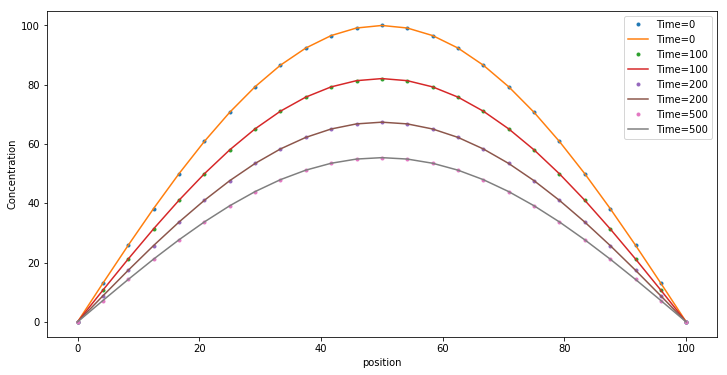

In [20]:
D=2
A=100
L=100 #values for simulation
N=25
dx=L/(N-1)
dt=1
X=np.arange(0,L+1,L/(N-1)) # position from center of diffusion
D_dt_dx2=(D*(dt))/(dx**2)

Grid=np.zeros((25,300)) #grid for forward-euler
Grid_exact=np.zeros((25,300)) # matrix for concentration using exact solution
for l in range(len(Grid[:,0])):
    Grid[l][0]=A*np.sin((np.pi*l*dx)/L)
for v in range(len(Grid[0,:])-1): # will insure loop goes through time steps equal to t
    for m in range(len(Grid[:,0])):
        if m == 0: #These if statements ensure forward-euler is not executed on border
            continue
        if m == 24:
            continue
        Grid[m][v+1]=Grid[m][v]+D_dt_dx2*(Grid[m+1][v]-2*Grid[m][v]+Grid[m-1][v])
        
for v in range(len(Grid[0,:])): 
    for m in range(len(Grid[:,0])):
        if m == 0: #These if statements ensure forward-euler is not executed on border
            continue
        if m == 24:
            continue
        Grid_exact[m][v]=np.exp(((-np.pi**2)*v*D)/(L**2))*A*np.sin((np.pi*m*dx)/L)     
plt.figure(figsize=(12,6))
for u in range(4):
    if u == 3:
        plt.plot(X,Grid[:,299],'.',label='Time=500')
        plt.plot(X,Grid_exact[:,299],label='Time=500')
    else:
        plt.plot(X,Grid[:,u*100],'.',label=('Time='+str(u*100)))
        plt.plot(X,Grid_exact[:,u*100],label=('Time='+str(u*100)))

plt.xlabel('position')
plt.ylabel('Concentration')

Error=np.zeros((25,300))
for q in range(len(Error[0,:])):
    for z in range(len(Error[:,0])):
        if z == 0:
            continue
        if z == 24:
            continue
        Error[z][q]=np.absolute((Grid[z][q]-Grid_exact[z][q])/Grid_exact[z][q])
plt.legend()

list_error=np.ndarray.flatten(Error) #transoforms matrix into 1d so finding max can be done on single axis
print(max(list_error))
print(np.mean(list_error))

# Question 1(c&d) response

In the above graph, we can see that the print(max(list_error)) which correpsonds to the maximum relative error and is the first entry is .0002 approximately,with a dt =1.

As for our second measure of error, we use a mean of the relative error.  Since each relative error will go towards 0 as dt and dx go to 0, the average will as well.

As for the pattern between the errors, below is an attempt to reconcile what may be the relation between dx,dt and E.  The graph shows jagged oscillations, but all the values are very low. That being the case, it would be reasonable to think that the error is roughly constant for a given courant ratio.

0.0003871022020284374


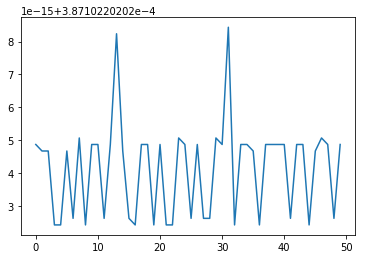

In [23]:
D=2
A=100
L=75 #values for simulation
N=25
dx=L/(N-1)
dt=1.02
X=np.arange(-12,13,1) # position from center of diffusion
D_dt_dx2=(D*(dt))/(dx**2)
Error_plot=np.zeros(50)
Avg_Error_plot=np.zeros(50)
for t in range(50):
    L=75+t*100
    dx=(L)/(N-1)
    dt=((D_dt_dx2)*(dx)**2)/D
    Grid=np.zeros((25,300)) #grid for forward-euler
    Grid_exact=np.zeros((25,300)) # matrix for concentration using exact solution
    for l in range(len(Grid[:,0])):
        Grid[l][0]=A*np.sin((np.pi*l*dx)/L)
    for v in range(len(Grid[0,:])-1): # will insure loop goes through time steps equal to t
        for m in range(len(Grid[:,0])):
            if m == 0: #These if statements ensure forward-euler is not executed on border
                continue
            if m == 24:
                continue
            Grid[m][v+1]=Grid[m][v]+D_dt_dx2*(Grid[m+1][v]-2*Grid[m][v]+Grid[m-1][v])
    for v in range(len(Grid[0,:])): 
        for m in range(len(Grid[:,0])):
            if m == 0: #These if statements ensure forward-euler is not executed on border
                continue
            if m == 24:
                continue
            Grid_exact[m][v]=np.exp(((-np.pi**2)*v*D*dt)/(L**2))*A*np.sin((np.pi*m*dx)/L)     
    Error=np.zeros((25,300))
    for q in range(len(Error[0,:])):
        for z in range(len(Error[:,0])):
            if z == 0:
                continue
            if z == 24:
                continue
            Error[z][q]=np.absolute((Grid[z][q]-Grid_exact[z][q])/Grid_exact[z][q])
    list_error=np.ndarray.flatten(Error) #transoforms matrix into 1d so finding max can be done on single axis    
    Error_plot[t]=max(list_error)
    Avg_Error_plot[t]=np.mean(list_error)
    
plt.plot(Error_plot)
#plt.plot(Grid[:,100],'*')
#plt.plot(Grid_exact[:,100])
print(max(Error_plot))

# Question 2 code

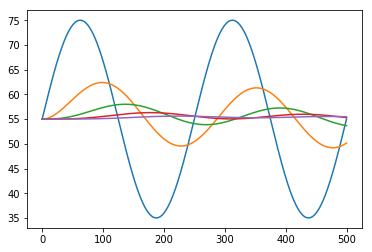

In [4]:
c=2
L_2=5
N=50
dx_2=5/N-1
dt_2=.004
D_dt_dx2_2=(D*(dt_2))/(dx_2**2)
temp_grid=np.zeros((N,501))
temp_grid[:,0]=55
temp_grid[N-1,:]=55
for u in range(len(temp_grid[0,:])):
    temp_grid[0][u]=55+20*np.sin(2*np.pi*dt_2*u)
for z in range(len(temp_grid[0,:])-1):
    for x in range(len(temp_grid[:,0])-1):
        if x == 0:
            continue
        if x == N-1:
            continue
        temp_grid[x][z+1]=temp_grid[x][z]+D_dt_dx2_2*(temp_grid[x+1][z]-2*temp_grid[x][z]+temp_grid[x-1][z])



#for g in range(11):
    #plt.plot(temp_grid[:,50*g])

for g in range(5):
    plt.plot(temp_grid[g,:])

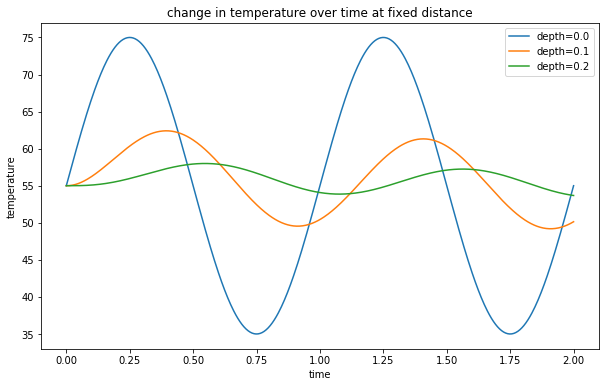

In [9]:
plt.figure(figsize=(10,6))
time=np.zeros(501)
for k in range(len(time)):
    time[k]=.004*k
for g in range(3):
    plt.plot(time,temp_grid[g,:],label=('depth='+str(g*.1)))

plt.title('change in temperature over time at fixed distance')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
 #change in temp over variable time fixed distance

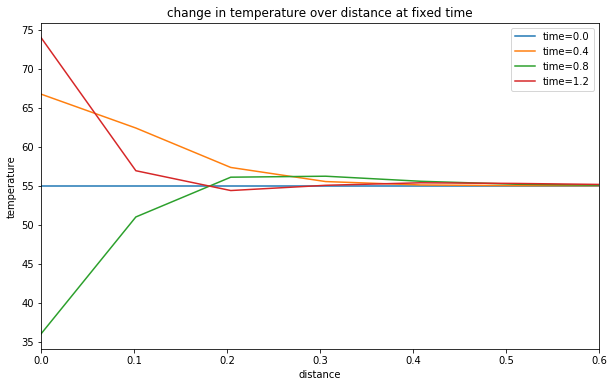

In [8]:
plt.figure(figsize=(10,6))
depth=np.zeros(50)
for u in range(len(depth)):
    depth[u]=(5/49)*u

for g in range(4):
    plt.plot(depth,temp_grid[:,100*g],label=('time='+str(100*g*(.004))))
plt.xlim(0,.6)
plt.title('change in temperature over distance at fixed time')
plt.xlabel('distance')
plt.ylabel('temperature')
plt.legend()
# change in temp over fixed time variable distance

# Question 3(c)

From parts a and b we received two different kinds of graphs. In the first, which is temperature changes over time at fixed distances from the surface, we see a cyclical graph the shifts and dampens over time.  Additionally, it occurs at relatively small changes in distance.  

For the second graph, we see temperature changes at fixed time and moving in depth.  Here we see temperatures exponentially decaying or increasing to the boundary temperature at distance L of 55.  Whether it decays or increases to the depth temperature depends on whether the surface is cooler or warmer than that depth.

A biological implication could be that temperature sensitive microbes reside at the depths where temperature is fixed. An additional implication would be that roots uptake nutrients and metabolize at a certain optimized temperature.  If the lower depth ground temperature, which can be approached at a fairly shallow depth, is more optimum than the shallower depths, it is likely plants promote root growth to these depths.  That is, provided nutrients are sufficiently high at those depths

# Question 3(d)

If these graphs were presented in a paper, the ideal to me would be two to 3 graphs overlayed or subplotted for each of the two graph types.  Coloration is not needed, but some kind of identifiable marks for each line would be necessary.  Additionally, if marked points, corresponding to the same time and depth on each of the graphs were inserted this would be useful, especially if we're looking at when things like boundary points are approached.